In [4]:
y <- read.csv("/content/TSLA_daily_20230101_20241231.csv")
print(y)

          date elon.musk tesla tsla trump tariff china electric.vehicle
1   2023-01-01        98    47   13     8     33    67               57
2   2023-01-02        83    55   26     7     43    62               68
3   2023-01-03        64    72   95     7     64    59               75
4   2023-01-04        57    74   78     7     70    59               74
5   2023-01-05        54    64   58     8     72    59               75
6   2023-01-06        50    62   68     8     66    62               67
7   2023-01-07        46    47   17     7     38    57               64
8   2023-01-08        56    44   10     6     35    59               61
9   2023-01-09        61    55   50     5     81    59               77
10  2023-01-10        54    50   45     6     82    57               71
11  2023-01-11        56    51   42     5     79    57               78
12  2023-01-12        56    51   39     6     82    56               73
13  2023-01-13        48   100   50     6     70    56          

In [5]:
# fit dynamic linear model
install.packages("astsa")
library(astsa)

dates <- as.Date(y$date)
y$volume <- y$volume / 1e6 # rescale volume since it's much larger than other columns
y <- y[, -1] # drop date column
colns <- lapply(colnames(y), identity)
num_day <- nrow(y)
num_series <- ncol(y)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
# make array of observation matrices
A = array(0, dim = c(num_series, num_series, num_day))
for (k in 1:num_day) {
  A[, , k] = diag(1, num_series)
  if (is.na(y[k, num_series])) {
    A[num_series-2, num_series-2, k] <- NA
    A[num_series-1, num_series-1, k] <- NA
    A[num_series, num_series, k] <- NA
  }
}

In [7]:
# Initial values
mu0 = matrix(0, num_series, 1)
Sigma0 = diag(c(0.1, 0.1, 1), num_series)
Phi = diag(1, num_series)
cQ = diag(c(0.1, 0.1, 1), num_series)
cR = diag(c(0.1, 0.1, 1), num_series)

iteration    -loglikelihood 
    1          1767360 
    2          26297.2 
    3          24886.54 
    4          24486.81 
    5          24206.38 
    6          23940.36 
    7          23713.53 
    8          23526.69 
    9          23368.93 
    10          23235.66 
    11          23125.15 
    12          23036.19 
    13          22966.83 
    14          22914.04 
    15          22874.17 
    16          22843.69 
    17          22819.7 
    18          22800.1 
    19          22783.44 
    20          22768.77 
    21          22755.49 
    22          22743.2 
    23          22731.62 
    24          22720.59 
    25          22709.97 
    26          22699.69 
    27          22689.68 
    28          22679.89 
    29          22670.3 
    30          22660.89 
    31          22651.64 
    32          22642.53 
    33          22633.56 
    34          22624.73 
    35          22616.04 
    36          22607.47 
    37          22599.03 
    38          22590.71

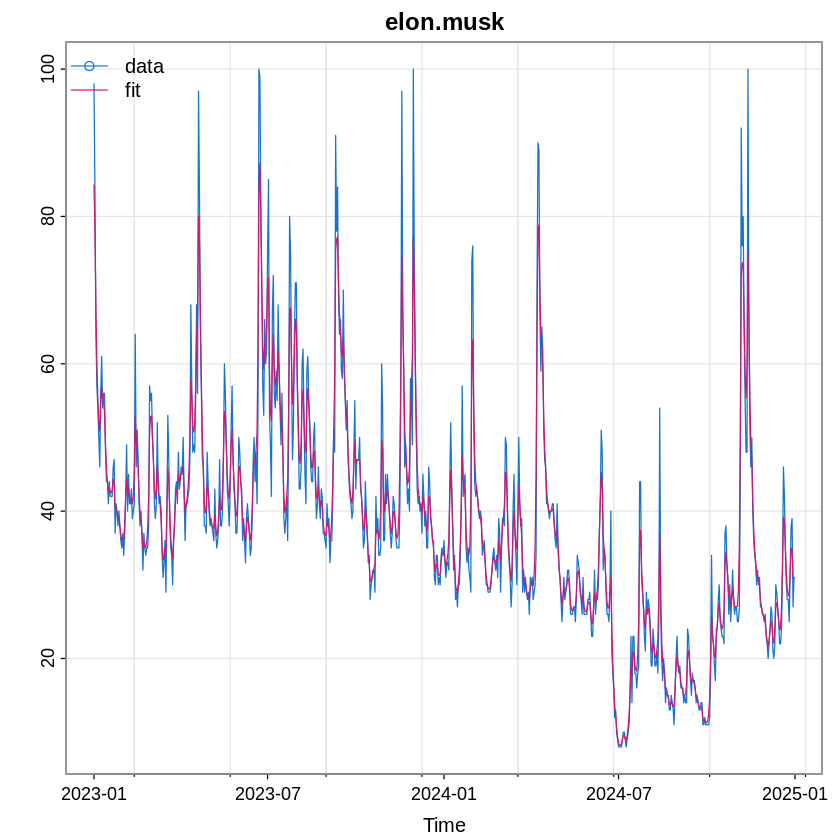

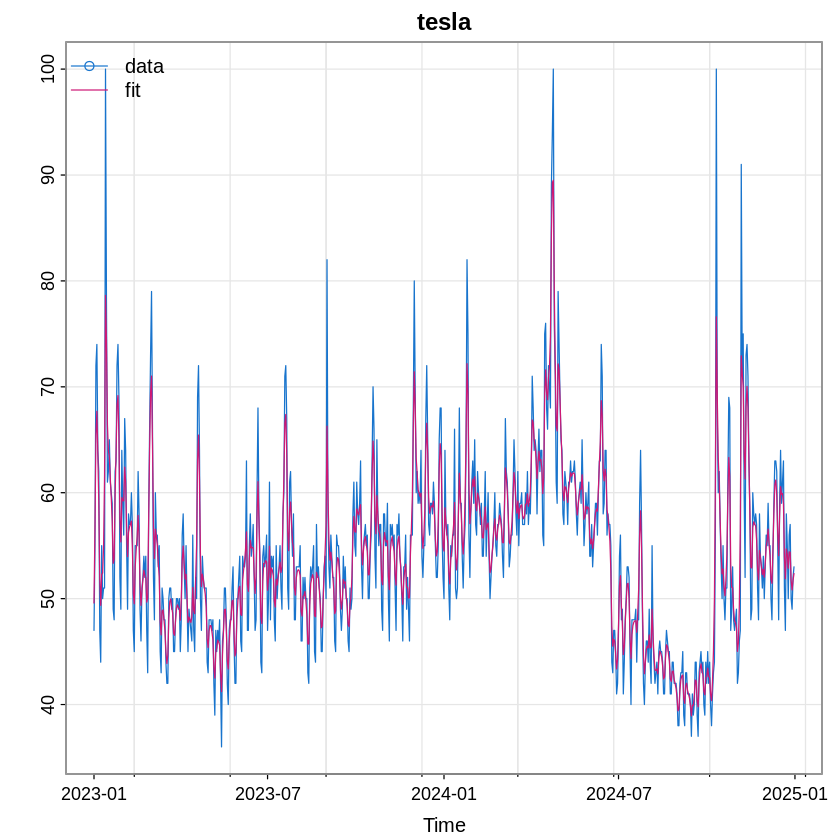

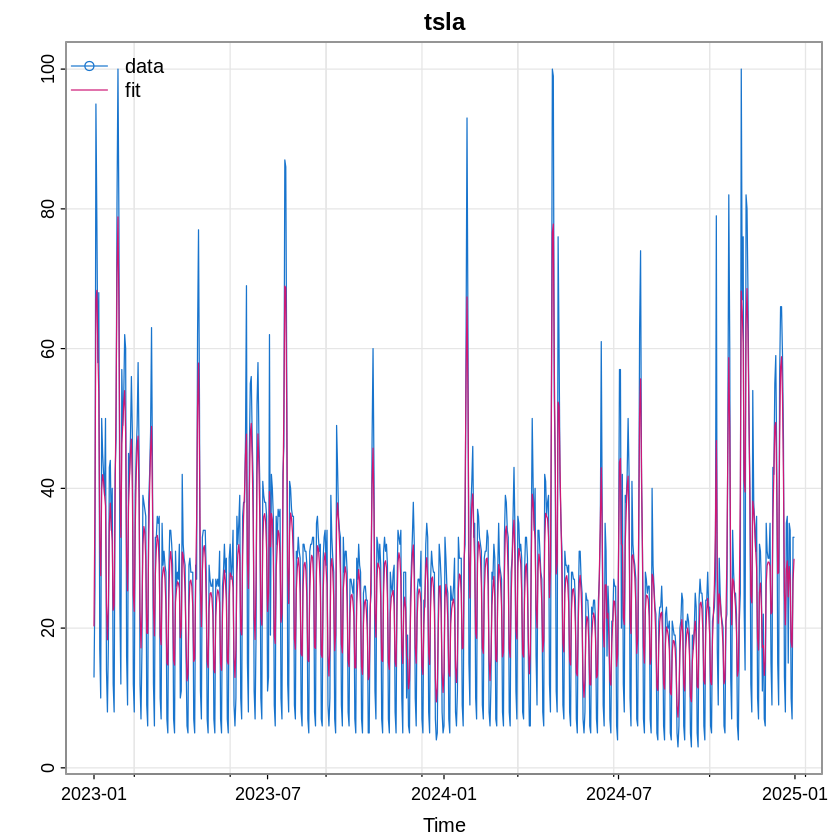

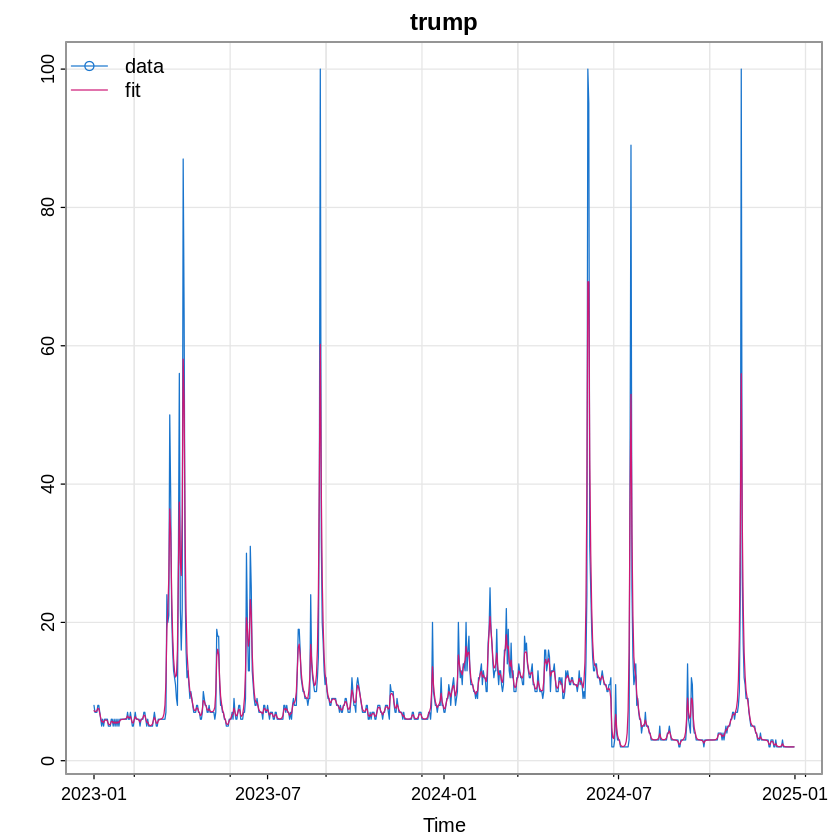

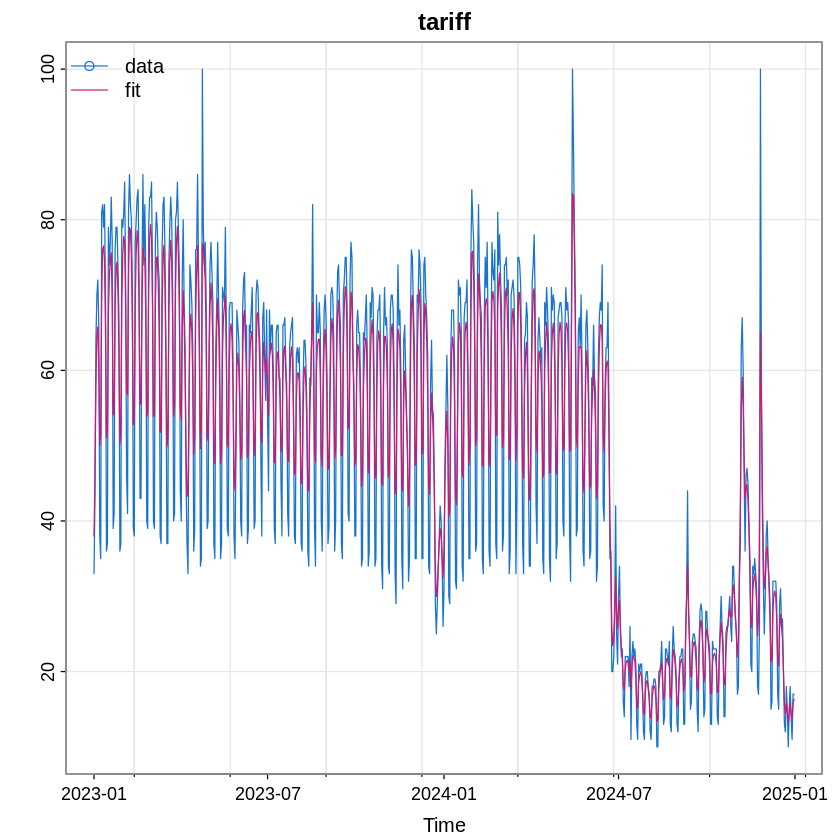

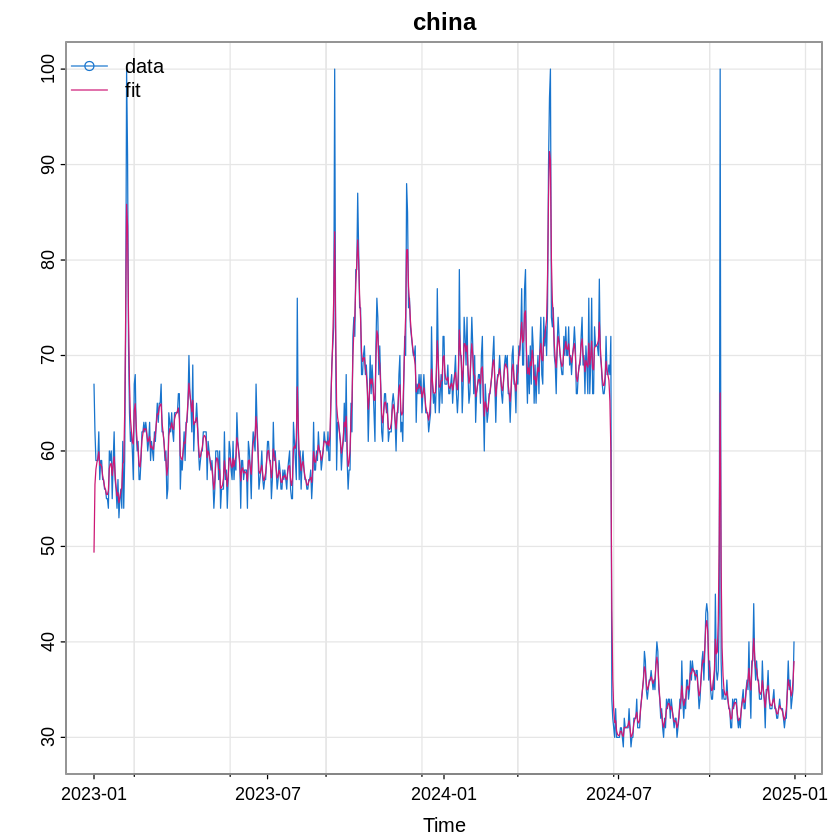

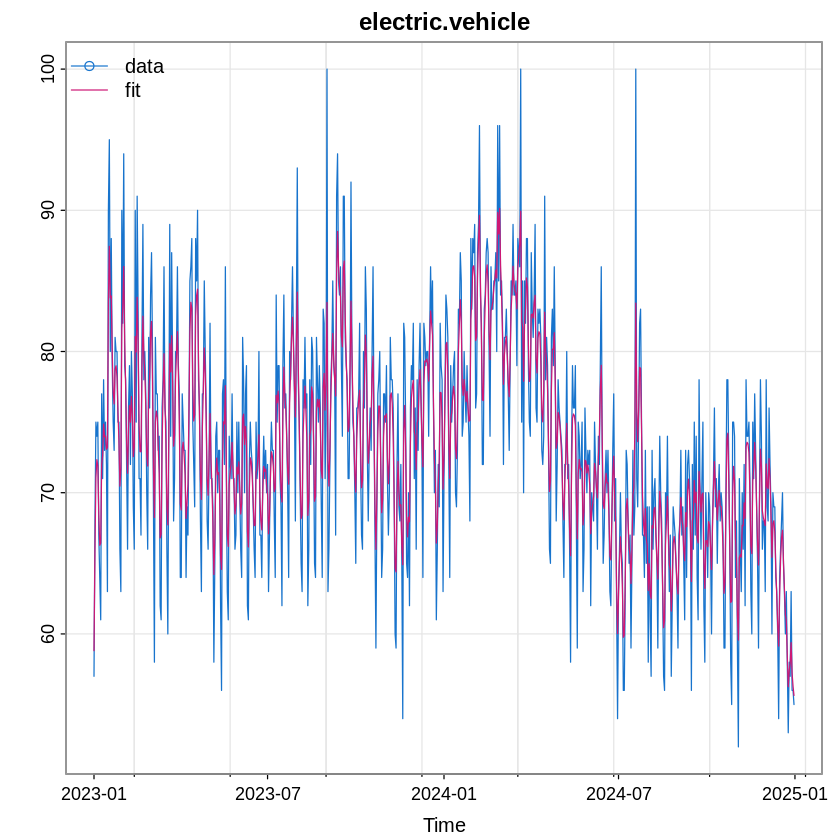

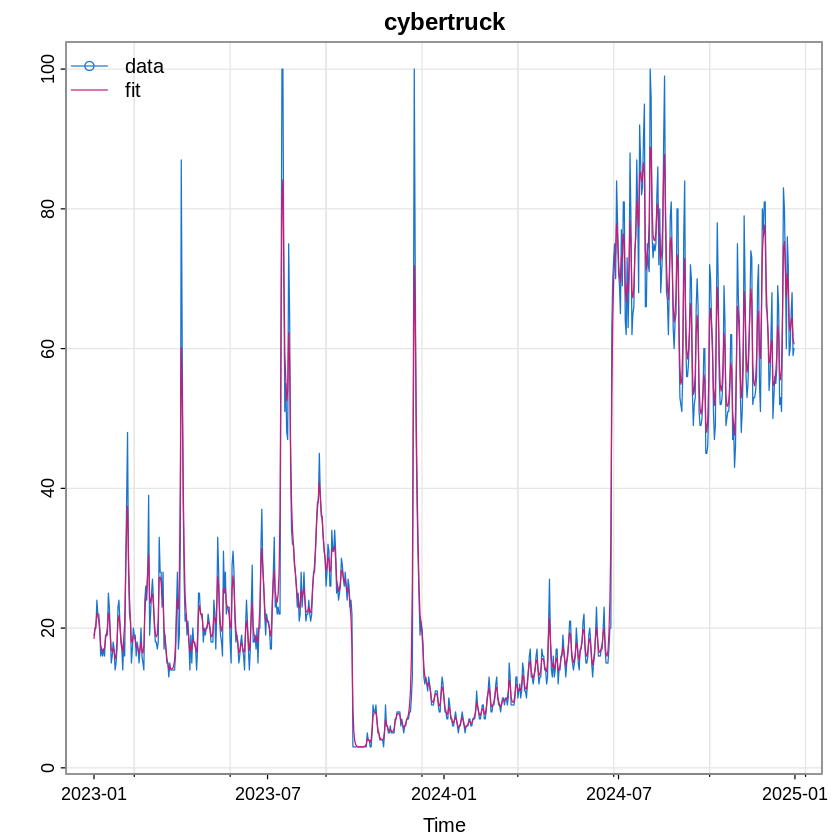

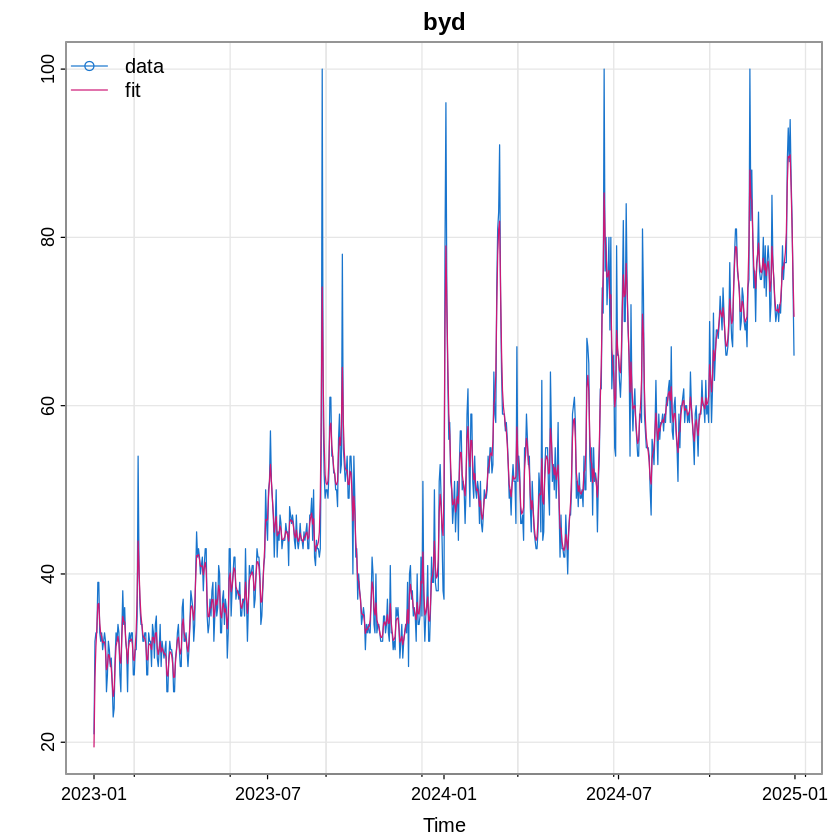

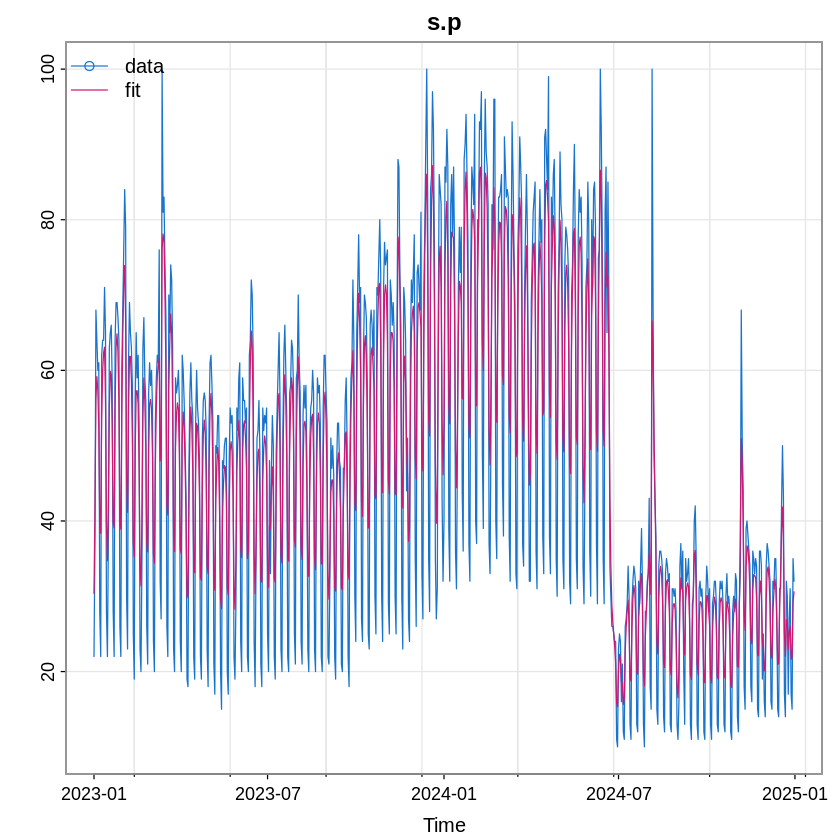

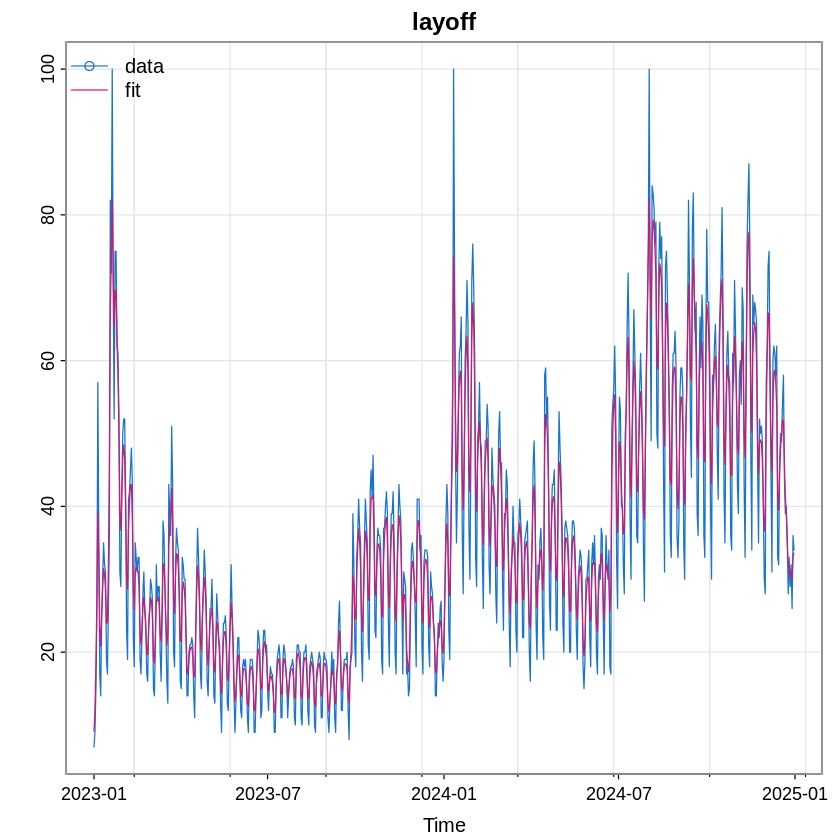

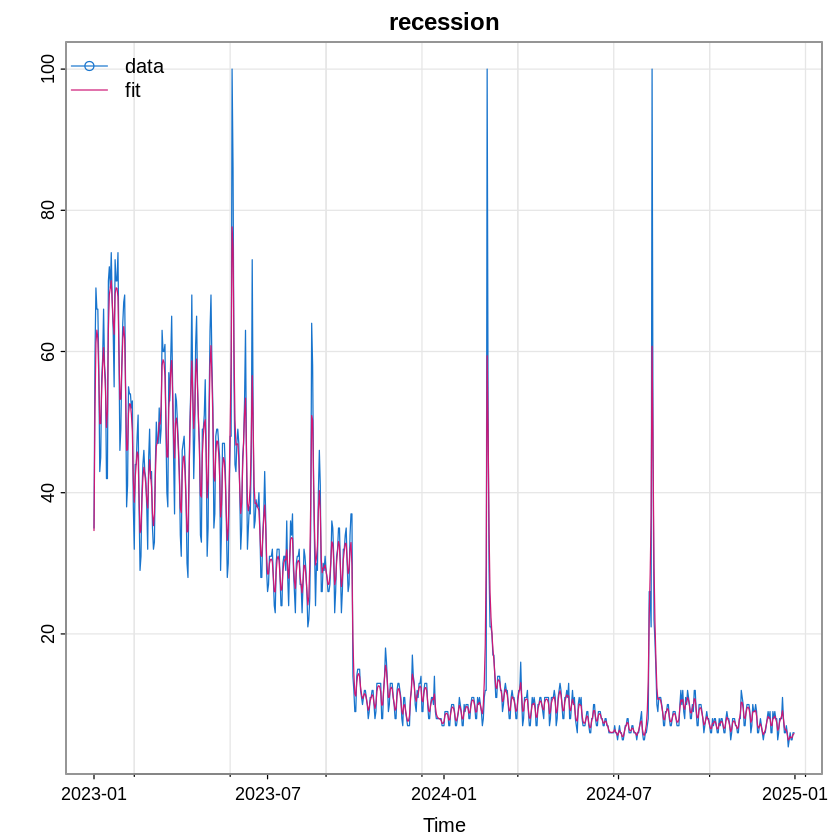

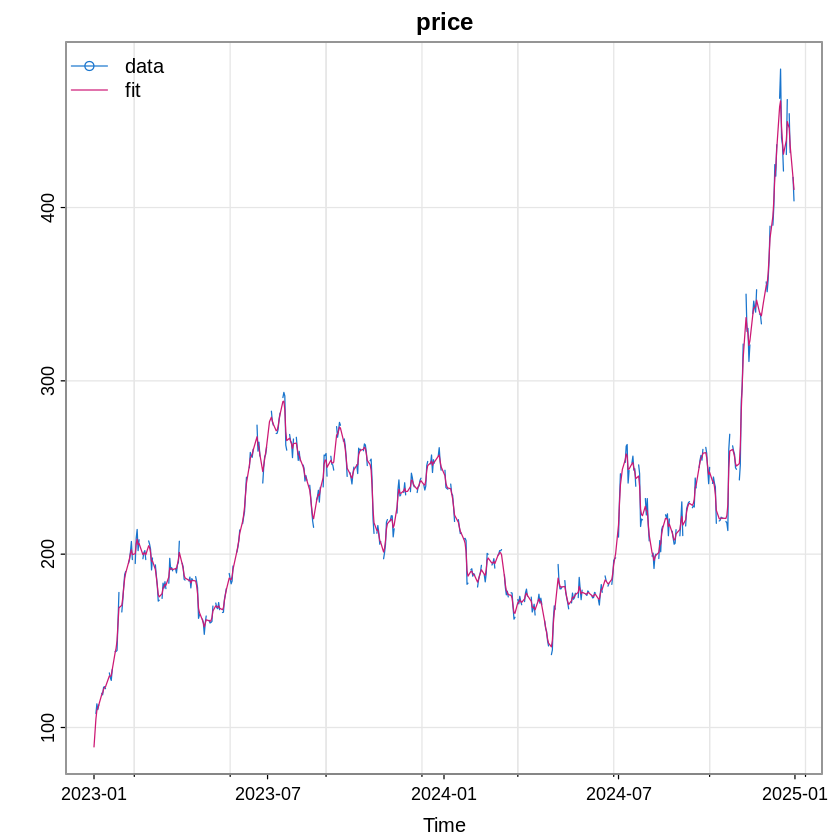

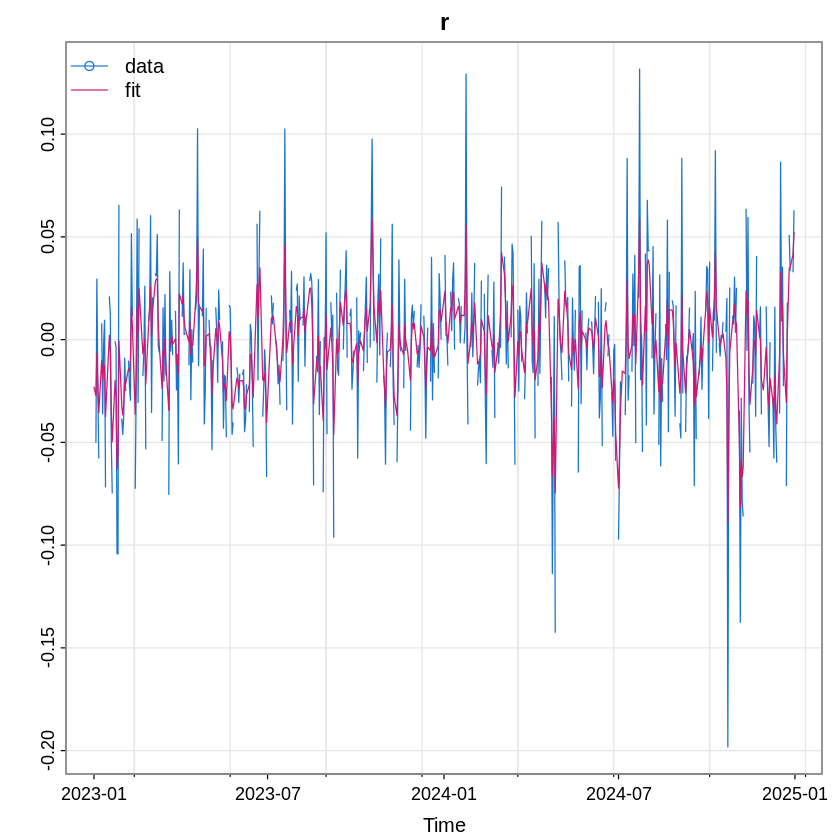

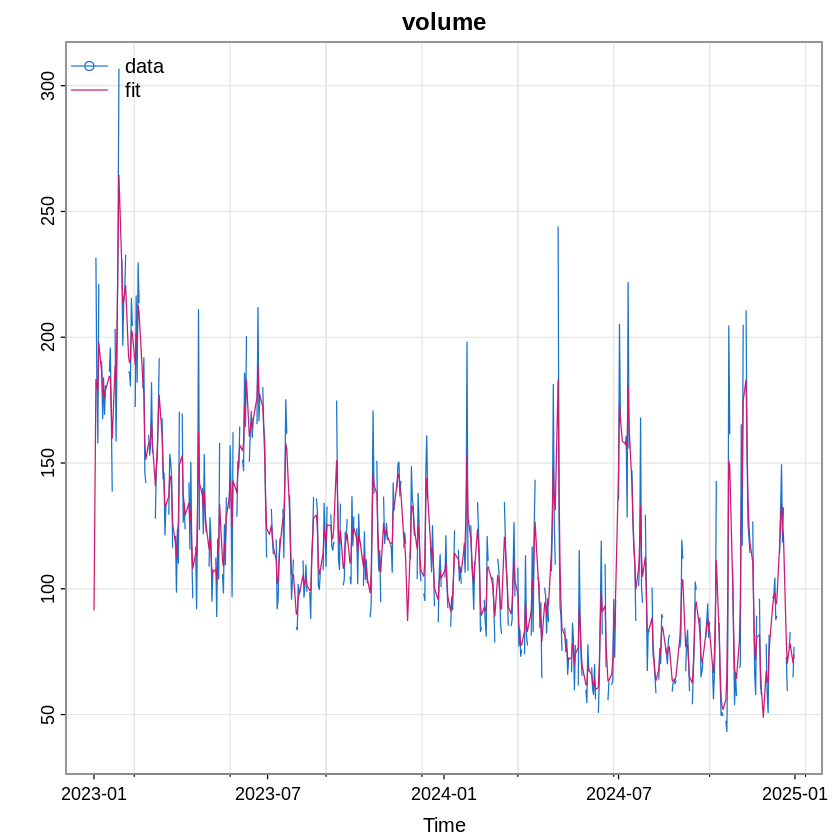

In [8]:
# EM procedure
em <- EM(y, A, mu0, Sigma0, Phi, cQ, cR)
print(em$Phi)
run <- Ksmooth(y, A, mu0, Sigma0, Phi, cQ, cR)

for (i in 1:15) {
  tsplot(dates, cbind(y[, i],run$Xs[i,,]), spaghetti=TRUE, col=c(4,6), pch=c(1,NA), main = paste(colns[i]))
  U = run$Xs[i,,]+1.96*sqrt(run$Ps[i,i,]); L = run$Xs[i,,]-1.96*sqrt(run$Ps[i,i,])
  xx = c(dates, rev(dates)); yy = c(L, rev(U))
  #polygon(xx, yy, border = 8, col = gray(.6, alpha = .2))
  legend('topleft', legend=c("data","fit"), lty=1, col=c(4,6), bty="n", pch=c(1,NA))
}